# Defacing pre-registration - Statistical analysis on image quality metrics (IQMs) in R

## Load IQMs dataframe

In [20]:
suppressWarnings(library(arrow))
iqms_df <- read.csv(file = 'iqms_df.csv')

iqms_df

X.1,subject,A,B,C,D,E,F,G,H,⋯,X..2,X..3,X..4,X..5,X..6,X..7,X..8,X..9,defaced,site
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0.888101931,0.95141318,0.755523154,0.76150185,0.834696741,0.76060151,0.1792498866,0.70594339,⋯,0.05962254,0.23004332,0.35502427,0.75479481,0.47512362,0.37827492,0.052236449,0.10949562,0,1
1,2,0.407770187,0.37015080,0.813923301,0.01975641,0.226272878,0.07845983,0.0680227098,0.95422938,⋯,0.38402619,0.79095243,0.03153761,0.71208873,0.65605558,0.97286155,0.500268010,0.96760631,0,1
2,3,0.001942778,0.81393894,0.824818924,0.65012325,0.613852950,0.79309227,0.5257070505,0.52038171,⋯,0.27994057,0.64252915,0.30093692,0.42620779,0.89902450,0.36593172,0.971136013,0.65342610,0,1
3,4,0.762181238,0.07477031,0.760510060,0.63329418,0.078044072,0.71175720,0.4566786461,0.93202097,⋯,0.59431201,0.14393839,0.75741539,0.72776167,0.95717420,0.08942542,0.009151363,0.60252983,0,1
4,5,0.797820879,0.45385875,0.609823339,0.29539033,0.327321725,0.66633475,0.6642816468,0.13241528,⋯,0.49716149,0.09401781,0.93697653,0.31222359,0.32263038,0.59855396,0.439931725,0.02257622,0,1
5,6,0.744371743,0.99652663,0.305494889,0.06734006,0.157031958,0.91123598,0.6627938397,0.25152662,⋯,0.88230393,0.78490044,0.86452675,0.10895865,0.97897483,0.90878453,0.753191504,0.27352799,0,1
6,7,0.432631424,0.98548887,0.235137930,0.42307213,0.151277628,0.36062823,0.4467873539,0.86690739,⋯,0.51101829,0.58947615,0.56519716,0.68213754,0.08555502,0.42679484,0.068022536,0.56206705,0,1
7,8,0.415125327,0.11539607,0.130727380,0.31985264,0.002703157,0.78478849,0.8811772931,0.95573456,⋯,0.48121647,0.19967638,0.20558761,0.72212931,0.69008722,0.50336071,0.262070652,0.54505221,0,1
8,9,0.333885162,0.90661233,0.612417017,0.13327792,0.441996008,0.96656500,0.9213259975,0.78260542,⋯,0.81481623,0.91575610,0.10529692,0.91700417,0.95479895,0.04928263,0.774593562,0.01921712,0,1


The dataframe has been put together by running `LoadIQMs.py`

## Run PCA

The fact that many IQMs are heavily correlated represents a violation to the independency assumption of MANOVA. To remedy to this issue, we run PCA on the IQMs to extract principal components. PCA is performed only on the IQMs coming from the original data. That transform is applied on the IQMs from both the original and defaced data.

In [21]:
#Separate IQMs from the defaced and non-defaced condition
df_original <- subset(iqms_df, defaced == 0)
df_defaced <- subset(iqms_df, defaced == 1)

pca_original <- prcomp(df_original[c(-1,-2,-ncol(df_original), -ncol(df_original)+1)], scale=TRUE, retx=TRUE)

### Choose number of principal components

To choose the number of principal components to keep, we will apply the Kaiser criterion which states to drop components with an eigenvalue lower than 1.0. It is useful to complement this approach with the scree plot to make a decision for the component with an eigenvalue close to 1.0, e.g the eigenvalue might be just below but the component explains a significant part of the variance.

In [22]:
#Extract eigenvalues
diag(cov(pca_original$x))

PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
1.7455284 1.6663654 1.5884061 1.5530064 1.5267113 1.4807725 1.4475105 1.4016290 
      PC9      PC10      PC11      PC12      PC13      PC14      PC15      PC16 
1.4009341 1.3804761 1.3228485 1.2944810 1.2914529 1.2721853 1.2626498 1.2267617 
     PC17      PC18      PC19      PC20      PC21      PC22      PC23      PC24 
1.2086351 1.2032296 1.1838354 1.1551797 1.1435760 1.1142569 1.1086989 1.0858301 
     PC25      PC26      PC27      PC28      PC29      PC30      PC31      PC32 
1.0740693 1.0511970 1.0444474 1.0337862 1.0180593 1.0016879 0.9792046 0.9567565 
     PC33      PC34      PC35      PC36      PC37      PC38      PC39      PC40 
0.9447370 0.9320933 0.9037171 0.8926510 0.8836668 0.8634045 0.8540724 0.8380952 
     PC41      PC42      PC43      PC44      PC45      PC46      PC47      PC48 
0.8220916 0.8135344 0.7961024 0.7818554 0.7713945 0.7557026 0.7379779 0.7250480 
     PC49      PC50      PC51      PC52      PC53      PC54      PC55      PC56 
0.7136342 0.6867839 0.6741776 0.6700758 0.6520385 0.6405148 0.6121794 0.5944976 
     PC57      PC58      PC59      PC60      PC61      PC62 
0.5876203 0.5767601 0.5484677 0.5367198 0.5076100 0.4586071

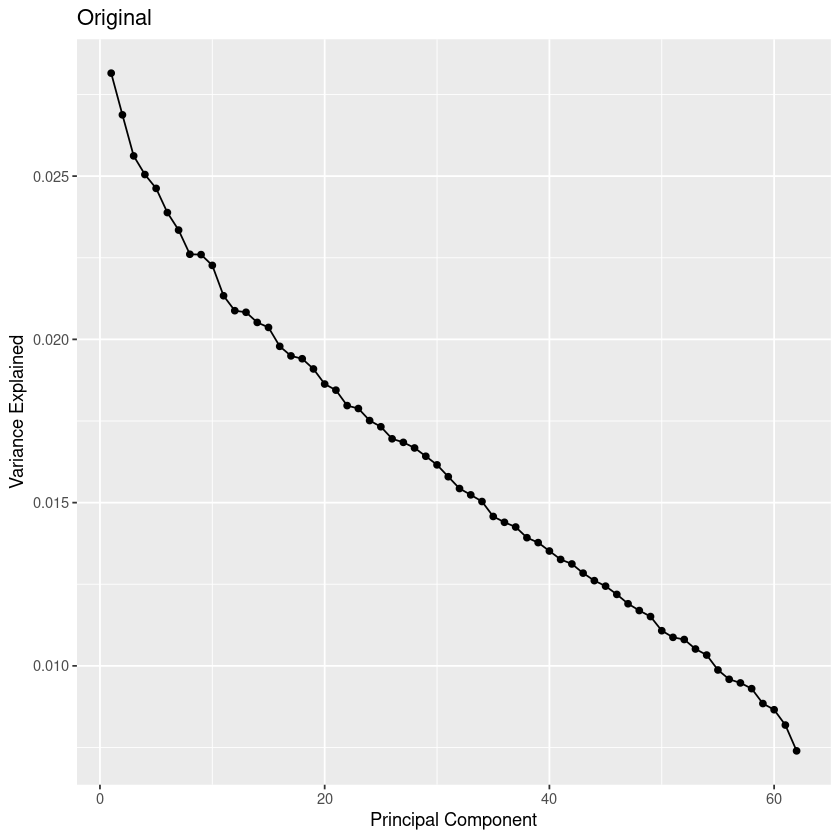

In [23]:
#calculate total variance explained by each principal component
var_explained_o = pca_original$sdev^2 / sum(pca_original$sdev^2)

#create scree plot
library(ggplot2)

qplot(c(1:length(var_explained_o)), var_explained_o) +  
  geom_line() + 
  xlab("Principal Component") + 
  ylab("Variance Explained") +
  ggtitle("Original")

The Kaiser criterion informs to keep only the 30 first components in the original case. Furthermore, the components around 31 do not explain a significant part of the variance according to the scree plot. We can thus apply the cut-off of keeping the 30 first principal components.

### Rerun PCA with the decided nbr of components

In [24]:
pca_original <- prcomp(df_original[c(-1,-2,-ncol(df_original), -ncol(df_original)+1)], scale=TRUE, retx=TRUE, rank=30)

#Project defaced IQMS onto the PCA basis
rotated_defaced <- scale(df_defaced[c(-1,-2,-ncol(df_defaced), -ncol(df_defaced)+1)], center=TRUE, scale=TRUE) %*% pca_original$rotation

#Combine IQMs projected onto the PCA basis
projected_iqms <- rbind(pca_original$x, rotated_defaced)

#Recombine the projected IQMs into a dataframe
defaced <- iqms_df$defaced
site <- iqms_df$site
subject <- iqms_df$subject
projected_iqms_df <- cbind(subject, projected_iqms, defaced, site)
projected_iqms_df

,subject,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,⋯,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,defaced,site
1,1,-1.8724400973,-0.1242126,-0.89393701,1.90739369,-0.81159248,-1.79951388,-0.96303998,1.7833434,2.14924846,⋯,-0.88514951,-0.69753216,0.51199748,0.17575812,-0.79893761,-0.09225032,-0.30780503,-0.078398596,0,1
2,2,1.4523500944,-1.3029858,1.38193771,0.24316196,1.44387528,-1.70891334,-0.92939983,-1.8673702,1.02766864,⋯,-0.21152428,-1.50356410,2.89209007,-0.40357053,0.26094750,0.71534340,0.27832907,1.167738611,0,1
3,3,1.7916181609,-2.3833158,-1.22089854,1.65576966,-0.30001821,0.50233047,0.53281586,1.4035552,-2.58099143,⋯,-0.26259966,-0.07020691,0.53449119,-0.73289692,0.10341257,1.14598189,-0.11779318,0.007660887,0,1
4,4,0.7328952947,-0.6761908,-0.66612050,-1.80662500,-0.14923254,-1.44185051,0.06885175,1.0429941,2.27544972,⋯,-1.00685302,2.46080451,0.55739759,-1.62073425,-0.84704860,0.25266984,0.77904049,-0.096968371,0,1
5,5,0.0308274937,1.0749393,1.09780127,0.90683028,-0.48715202,-0.26897824,0.56303881,-0.2787285,-0.05842465,⋯,0.38409467,0.51689238,-0.41451511,1.52444333,-0.35833433,0.10527277,-1.29042873,0.196815316,0,1
6,6,0.7108685733,0.2866679,-2.23756635,-0.58633432,-1.66266375,0.38408076,0.70887522,1.1052294,-0.68049325,⋯,-0.67632203,-1.58647015,0.85913605,1.10661749,-0.25427452,-0.75564586,-0.29641342,0.926625138,0,1
7,7,-0.3146436654,0.4670782,0.75615128,0.79753894,0.13840919,-0.75056456,2.06805787,2.1222808,0.27506806,⋯,-0.86278816,-0.21998976,-3.60681372,-1.05830536,1.69388311,0.69807962,0.91255123,2.074379979,0,1
8,8,-0.7944189054,0.5043277,0.07326068,-2.59212840,-0.14550944,-1.11106943,1.21076748,0.2322823,-1.02104316,⋯,0.53797365,0.45440015,-0.08944799,-0.49600675,-1.80766398,0.61886771,0.53379443,0.577536807,0,1
9,9,-1.8375589437,0.1020704,-3.31165165,-0.91458332,2.47905360,1.46315710,1.52442238,-1.2898569,0.59009187,⋯,-0.28002248,-2.50749712,-2.11590650,0.53781225,1.89296460,-0.31388450,-0.98748201,-0.999506931,0,1
10,10,-0.5069689483,2.6253934,-1.69124980,-1.68067917,-0.84884548,1.04764752,-0.27285383,1.3281060,0.61063452,⋯,1.05930981,0.44667817,1.68062086,-1.68060065,-1.48359914,1.88693199,-1.01339345,-0.517207017,0,1


## Run MANOVA

In [25]:
library(MANOVA.RM)

#Construct formula
dep_var <- ''
col_names <- colnames(projected_iqms_df)
#Remove non-iqms column names
iqms_keys <- col_names[c(-1,-2,-length(col_names),-length(col_names)+1)]
for (key in iqms_keys){
    dep_var <- paste(dep_var, sprintf('%s +',key))
}
dep_var = substring(dep_var,1, nchar(dep_var)-2)

my_formula <- as.formula(paste(dep_var, " ~ site * defaced"))
my_formula

fit <- multRM(my_formula, data = projected_iqms_df, subject = 'subject', within = 'defaced')
summary(fit)

PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + PC11 + 
    PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 + PC19 + PC20 + 
    PC21 + PC22 + PC23 + PC24 + PC25 + PC26 + PC27 + PC28 + PC29 + 
    PC30 ~ site * defaced

Call: 
PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + PC11 + 
    PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 + PC19 + PC20 + 
    PC21 + PC22 + PC23 + PC24 + PC25 + PC26 + PC27 + PC28 + PC29 + 
    PC30 ~ site * defaced
A multivariate repeated measures analysis with  1 within-subject factor(s) ( defaced )and  1 between-subject factor(s). 

Descriptive:
  site defaced   n
1    1       0 185
2    1       1 185
3    2       0 197
4    2       1 197
5    3       0 198
6    3       1 198
  PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 + PC19 + PC20 + PC21 + PC22 + PC23 + PC24 + PC25 + PC26 + PC27 + PC28 + PC29 + PC30
1                                                                                                                                                                                            0.481
2                                                                                                             

# Comparison of the covariance matrices

In [26]:
library(heplots)

boxM(iqms_df[,4:ncol(iqms_df)-1], iqms_df[,ncol(iqms_df)])


	Box's M-test for Homogeneity of Covariance Matrices

data:  iqms_df[, 4:ncol(iqms_df) - 1]
Chi-Sq (approx.) = 3896.2, df = 4032, p-value = 0.936


Box's (1949) M-test tests for homogeneity of covariance matrices. The null hypothesis for this test is that the observed covariance matrices are equal across groups. In other words, a non-significant test result indicates that the covariance matrices are equal.